In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn import datasets
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split

In [10]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True) #id'ye ihtiyacımız yok, Unnamed: 32 de hiçbir bilgi içermiyor

In [12]:
diagnosis_mapping = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)  #Burada 'M' ve 'B'yi 0 ve 1'e map ediyoruz

In [13]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

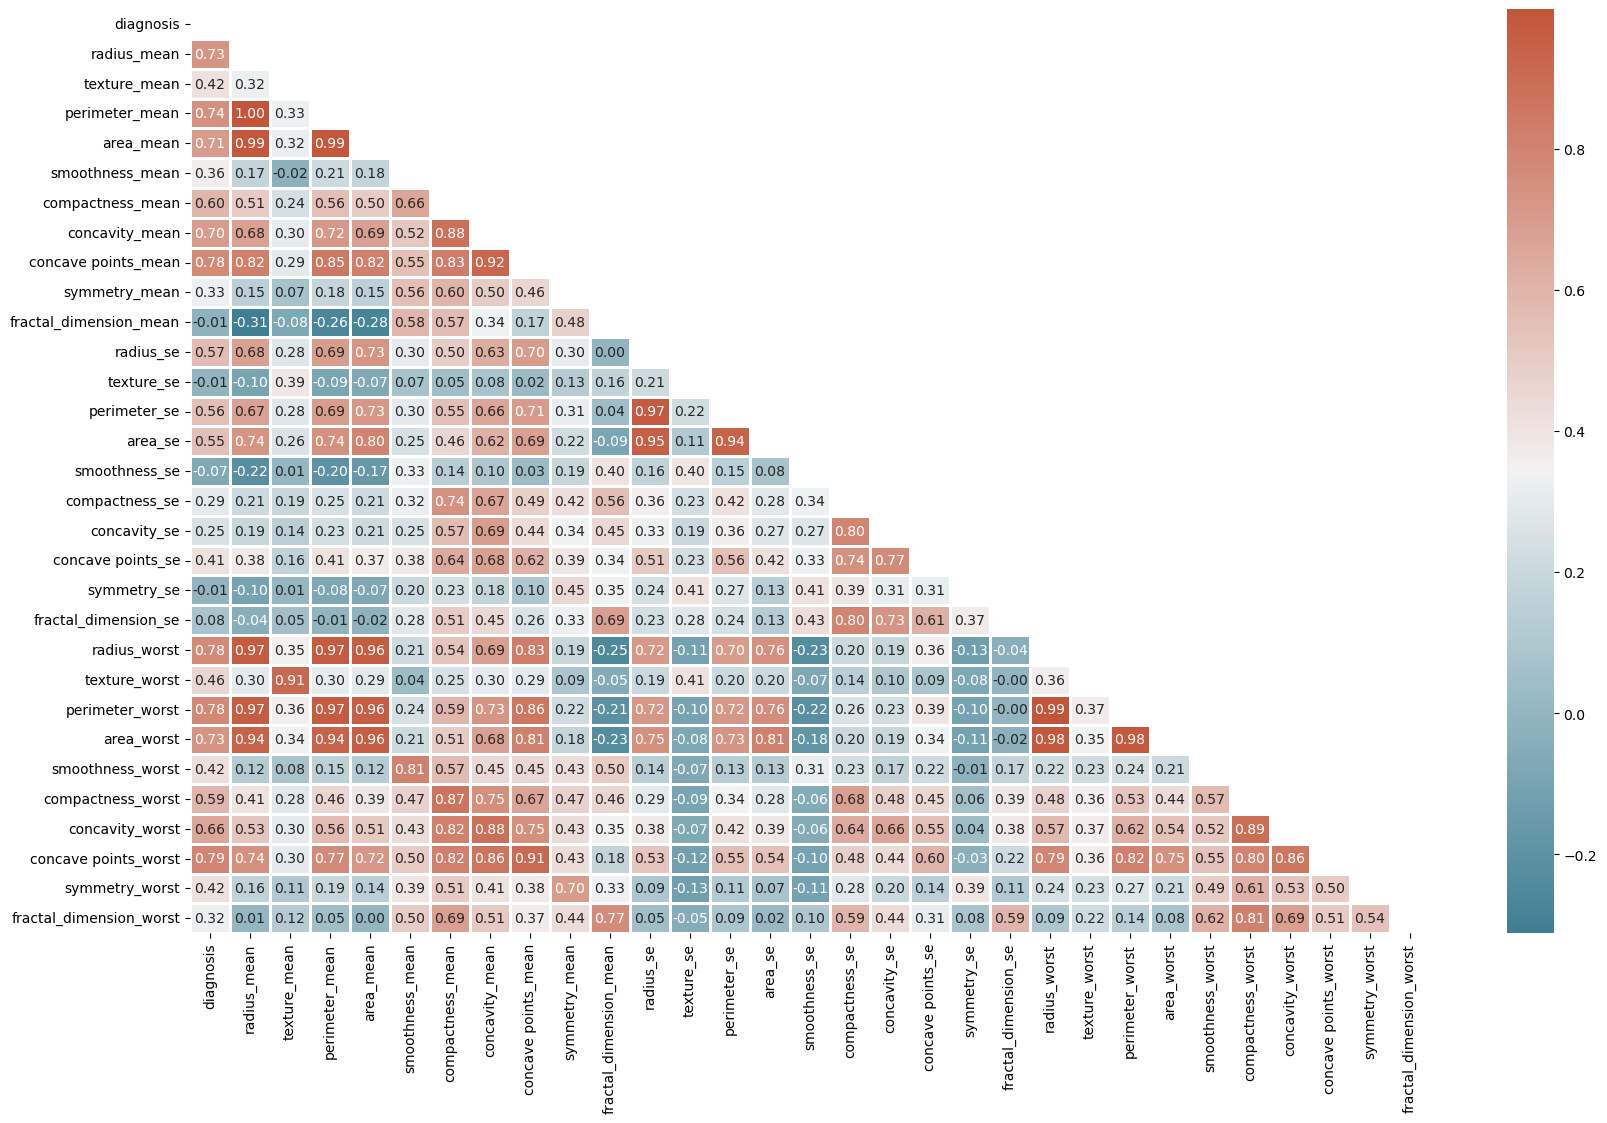

In [14]:
plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) #Correlation matrisinin upper triangle değerleri gözükmesin diye üst üçgeni kapattım
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

In [15]:
corr_matrix = corr.mask(mask)
toDrops= [x for x in corr_matrix.columns if any(corr_matrix[x] > 0.90)]
df = df.drop(toDrops, axis = 1)
print(f"New data frame's column number is: {df.shape[1]}")

New data frame's column number is: 21


In [16]:
#Feature sayımız 32'den 21'e düştü

In [17]:
#Şimdi scaling işlemini yapalım:

In [18]:
#Önce verimizi ayıralım

In [19]:
X = df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

In [21]:
#Şimdi PCA ile boyut indirgeyelim:

In [22]:
pca = decomposition.PCA(n_components=5)
pca.fit(X)
components = pca.transform(X)

In [23]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [24]:
#verimizi train_test_split fonksiyonu ile eğitim ve test kümesine ayırıyoruz:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(components, y, test_size=0.20,random_state=0,shuffle=False)

In [26]:
def SVM_Model(x, y, testSize):

    global x_train , x_test , y_train , y_test , y_pred
    
    rows = []
    
    for n in testSize:
        x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = n , random_state = 0)
        
        # Create SVM model
        svc=SVC(kernel='linear') 

        # fit SVM to training set
        svc.fit(x_train,y_train)

        # make predictions on test set
        y_pred=svc.predict(x_test)
            
        dataset = {'Test_size': n, 'acc': metrics.accuracy_score(y_test, y_pred), 'score': svc.score(x, y)}
        rows.append(dataset)
        evaluation3 = pd.DataFrame(rows)            
            
    return (evaluation3)   
# We want to hightlight the maximume values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [27]:
evaluation = SVM_Model(X, y, [0.1, 0.15, 0.2, 0.25, 0.3])
evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,1.000000,0.987698
1,0.150000,1.000000,0.987698
2,0.200000,0.973684,0.985940
3,0.250000,0.972028,0.985940
4,0.300000,0.970760,0.984183


In [28]:
svm=SVC(kernel='linear',random_state = 1) 

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)

In [29]:
def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))

In [30]:
Report(y_test , y_pred)

Accuracy : 97.07602339181285% 

Confusion Matrix : 

[[104   4]
 [  1  62]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [32]:
print("Training set score: {:.2f}".format(svm.score(x_train, y_train)))
print("Test set score: {:.2f}".format(svm.score(x_test, y_test)))

Training set score: 0.99
Test set score: 0.97


[Text(0, 0.5, 'Malignant'), Text(0, 1.5, 'Benign')]

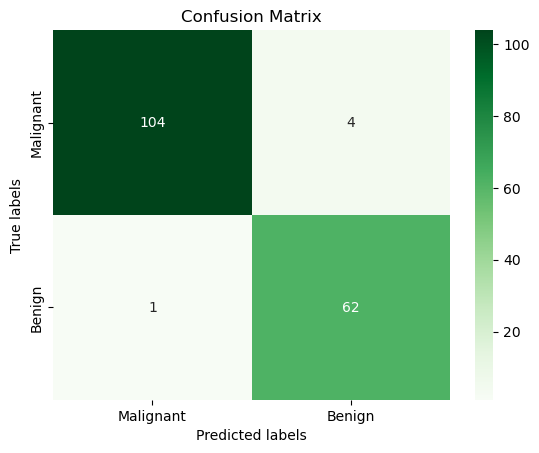

In [33]:
cMatrix = confusion_matrix(y_test, y_pred)
plot= plt.subplot()
sns.heatmap(cMatrix, annot=True, fmt='g', ax=plot, cmap='Greens')
plot.set_xlabel('Predicted labels');plot.set_ylabel('True labels')
plot.set_title('Confusion Matrix')
plot.xaxis.set_ticklabels(['Malignant', 'Benign']); plot.yaxis.set_ticklabels(['Malignant', 'Benign'])

In [34]:
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [35]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,  param_grid=dict(kernel=kernel,
                                                         gamma=gamma,
                                                         decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9774367088607594
best param:  {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

45
45


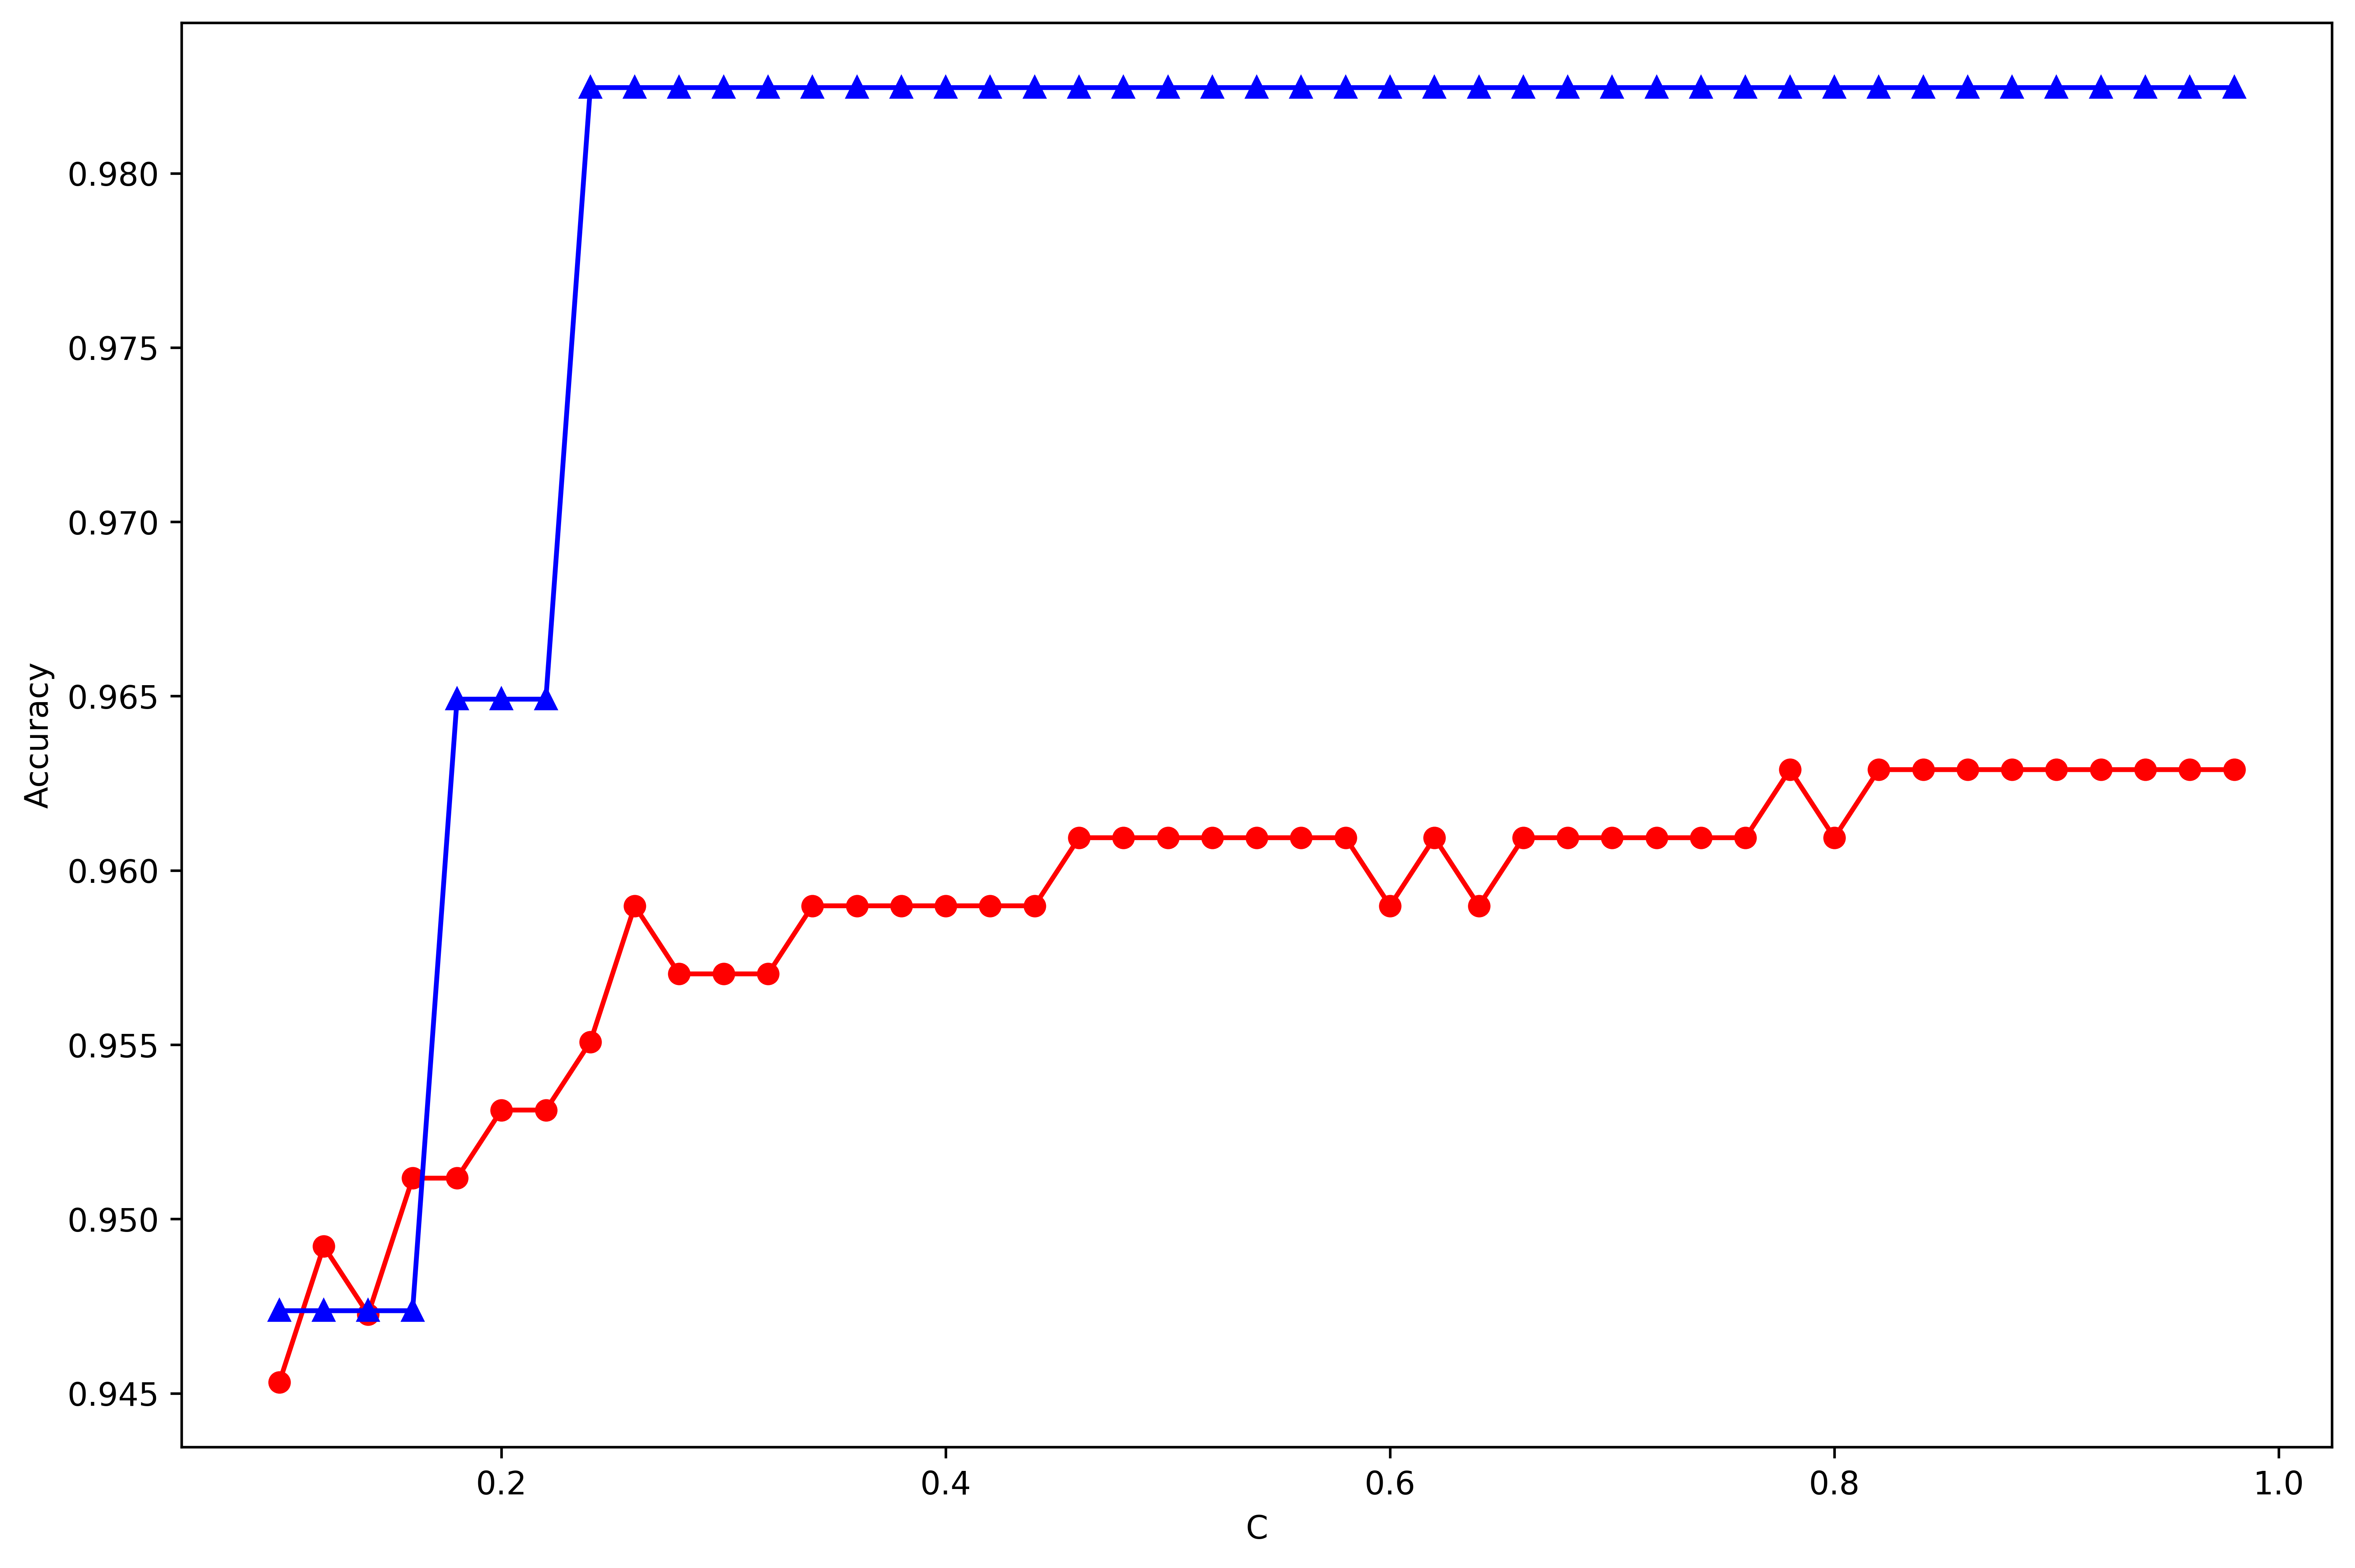

In [36]:
train_score, test_score = [], []
x = df.drop('diagnosis', axis=1)
y = df['diagnosis'].values.reshape(-1, 1) #Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True, random_state = 1)

for i in np.arange(0.1,1,0.02):
    svm = SVC(random_state = 1, kernel = 'linear', decision_function_shape = 'ovo', C = i)
    svm.fit(x_train, y_train)
    train_score.append(svm.score(x_train, y_train))
    test_score.append(svm.score(x_test, y_test))

print(len(train_score))
print(len(test_score))

plt.figure(figsize = (12, 8), dpi = 600)
plt.plot(np.arange(0.1, 1, 0.02), train_score, marker = 'o', color = 'red', label = 'Train')
plt.plot(np.arange(0.1, 1, 0.02), test_score, marker = '^', color = 'blue', label = 'Test')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [37]:
svm1=SVC(C=0.3,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)

C:\Users\mehme\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
Report(y_test , y_pred)

Accuracy : 98.24561403508771% 

Confusion Matrix : 

[[34  0]
 [ 1 22]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        23

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



In [39]:
print("Training set score: {:.2f}".format(svm1.score(x_train, y_train)))
print("Test set score: {:.2f}".format(svm1.score(x_test, y_test)))

Training set score: 0.96
Test set score: 0.98
